#Notebook : Community Detection ✅

Apply at least three different community detection algorithms for the attached undirected networks. It is not necessary to implement them, you may use any freely available software, with the exception of Pajek, which is forbidden for community detection (not for the rest of the tasks). At least one of the algorithms must be based on the optimization of modularity (but not all of them), and you must use at least two different programs (i.e., do not use the same application for the three algorithms).

Some of the provided networks have a partition of reference, obtained from external information. In these cases, you have to compare your partitions with them, using at least the following standard measures: Jaccard Index, Normalized Mutual Information (arithmetic normalization), and Normalized Variation of Information. It is not necessary to implement the calculation of these indices, you may use any program (e.g. Radatools). Beware that you may find implementations of the Jaccard Index that are not related to community detection, thus the results would be incorrect.

In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00


In [ ]:
!pip install dataframe_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall pycairo
!pip uninstall cairocffi
!apt-get install libcairo2-dev
!pip install pycairo
!pip install cairocffi

Found existing installation: cairocffi 1.5.0
Uninstalling cairocffi-1.5.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cairocffi-1.5.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/cairocffi/*
Proceed (Y/n)? Y
  Successfully uninstalled cairocffi-1.5.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol1-dev libxcb-render0-dev li

##Importing all the libraries ✅

In [ ]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib import gridspec
import networkx as nx
import os
import dataframe_image as dfi
from copy import deepcopy
from math import log
from community import community_louvain

from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix, pair_confusion_matrix

from networkx.algorithms import community
import networkx.algorithms.community as nx_comm

from collections import defaultdict


%matplotlib inline

In [ ]:
from igraph import InternalError

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Developing the functions to read the files ✅

A file in ".clu" format can be read in using the function read_clu, which will then return its content as either a membership list or a clusters list. The desired output type and the file path are the input parameters. 

The first thing the function does is open the file at the specified directory and read in all of its lines. It is expected that the file's content is in the right format. The function then verifies the chosen output type and, depending on the desired output, either calls membership_list() or clusters_list().

If "membership" is selected as the output type, membership_list() is invoked, which transforms the file content into a list of numbers, where each integer denotes a node's cluster membership. When "clusters" is selected as the output type, the file's content is transformed into a list of lists, where each inner list represents a cluster and contains the node ids for that cluster. The function then returns the outcome of invoking the proper conversion function.








In [ ]:
def read_clu(path, output_type):
    with open(path, 'r') as f:
        lines = f.readlines() 
        
    if output_type == 'membership':
        return membership_list(lines)
    
    if output_type == 'clusters':
        return clusters_list(lines)

In [ ]:
def membership_list(lines):

    membership_list=[]
    
    if isinstance(lines, str): 
        lines = iter(lines.split('\n'))
    lines = iter([line.rstrip('\n') for line in lines]) 
    
    while lines: 
        try:
            l = next(lines)
        except: 
            break
        if l.lower().startswith("*vertices"):
            l, nnodes = l.split()
            for vertice in range(int(nnodes)):
                l = next(lines)
                membership_list.append(int(l))
        else:
            break
            
    return membership_list

In [ ]:
def clusters_list(lines):
    
    if isinstance(lines, str):
        lines = iter(lines.split('\n'))
    lines = iter([line.rstrip('\n') for line in lines])
    
    while lines:
        try:
            l = next(lines)
        except: 
            break
        if l.lower().startswith("*vertices"):
            l, nnodes = l.split()
            communities = defaultdict(list) 
            for vertice in range(int(nnodes)): 
                l = next(lines)
                community = int(l)
                communities.setdefault(community, []).append(vertice) 
        else:
            break
            
    return [ set(v) for k,v in dict(communities).items() ] 

###Trying with exemples to see the reslts of or fciots  

In [ ]:
with open('/content/drive/MyDrive/A3-networks/toy/graph4+4.clu', 'r') as f:
        lines = f.readlines() 
print(lines)

['*Vertices 8\n', '1\n', '1\n', '1\n', '1\n', '2\n', '2\n', '2\n', '2\n']


In [ ]:
with open('/content/drive/MyDrive/A3-networks/real/cat_cortex_sim.clu', 'r') as f:
        lines = f.readlines() 
print(lines)

['*Vertices      55\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '2\n', '2\n', '2\n', '2\n', '2\n', '2\n', '2\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '3\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n', '4\n']


In [ ]:
with open('/content/drive/MyDrive/A3-networks/real/dolphins-real.clu', 'r') as f:
        lines = f.readlines() 
print(lines)

['*Vertices 62\n', '1\n', '2\n', '1\n', '1\n', '1\n', '2\n', '2\n', '2\n', '1\n', '2\n', '1\n', '1\n', '1\n', '2\n', '1\n', '1\n', '1\n', '2\n', '1\n', '2\n', '1\n', '1\n', '2\n', '1\n', '1\n', '2\n', '2\n', '2\n', '1\n', '1\n', '1\n', '2\n', '2\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '2\n', '1\n', '1\n', '1\n', '1\n', '1\n', '1\n', '2\n', '1\n', '1\n', '1\n', '1\n', '1\n', '2\n', '1\n', '2\n', '2\n', '1\n', '1\n', '2\n', '1\n']


In the following function, we first initialize an empty list to hold membership values. Then we convert each set in the input list into a sorted list. We, then, iterate over each cluster in the sorted list and iterate over each node in the cluster to be able to append the index of the current cluster to the membership list for each node in the cluster. Finally, after the loops, we return the final membership list. 

In [ ]:
def clusters_to_membership(c):     
    membership_list=[]
    n=0
    clusters=[sorted(list(s)) for s in c]
    for i,cluster in enumerate(clusters): 
        for node in range(len(cluster)):
            membership_list.append(i) 
    return membership_list

The following code will help us to create a .clu file that contains a collection of nodes' membership information to be able to use them after all for visualisation and analysis.


In [ ]:
def write_clu(membership_list,name):
    textfile = open('/content/drive/MyDrive/clu/'+name+'.clu', "w")
    textfile.write('*Vertices {} \n'.format(len(membership_list)))
    for element in membership_list:
        textfile.write(str(element) + "\n")
    textfile.close()

After defining the previous functions, we are able to develop the following part. In fact, this part will be used to set up and fill data structures that will hold network and membership information for the later analysis we will conduct. 


The network and membership data are stored in a folder, and its path is specified by the nets_folder_path variable. The os.scandir() function is then used by the code to scan the directory and retrieve a list of all of its contents, including any subfolders.

The for loop repeatedly goes through each of the directory's subfolders. The os.listdir() function is then used to get a list of files included in each subfolder. The process then loops over the list of files, treating any with a.net extension as network files. The network object that is produced is then placed in the nx_nets and ig_nets dictionaries with the file name (without the extension) serving as the key.

The file is considered as a membership file if its extension is.clu. So it adds the file name (without the extension) to the list of clu_names and then uses a special read_clu() function to read the membership information. With the file name as the key, the membership data is kept in the clu dictionary while the cluster data is kept in the clu_clusters dictionary.

In [ ]:
nx_nets = {}
ig_nets = {} 
clu = {}
clu_clusters = {}
clu_names=[]

nets_folder_path="/content/drive/MyDrive/A3-networks/"
with os.scandir(nets_folder_path) as folders_list:
    for folder in folders_list:
        if folder.is_dir():
            networks = os.listdir(nets_folder_path+folder.name)
            for net in networks:
                if net.endswith(".net"):
                    file=nets_folder_path+folder.name+'/'+net
                    nx_nets[('{}'.format(net[:-4]))] = nx.Graph(nx.read_pajek(file))
                    ig_nets[('{}'.format(net[:-4]))] = ig.read(file,format="pajek").simplify()
                elif net.endswith(".clu"):
                    clu_names.append(net[:-4])
                    file=nets_folder_path+folder.name+'/'+net
                    clu[('{}'.format(net[:-4]))] = read_clu(file, 'membership')
                    clu_clusters[('{}'.format(net[:-4]))] = read_clu(file, 'clusters')

In [ ]:
clu_to_nets={'graph3+1+3': 'graph3+1+3',
             '20x2+5x2': '20x2+5x2',
             'graph4+4': 'graph4+4',
             'star': 'star',
             'cat_cortex_sim': 'cat_cortex_sim',
             'zachary_unwh-real': 'zachary_unwh',
             'dolphins-real': 'dolphins',
             'football-conferences': 'football',
             '256_4_4_4_13_18_p': '256_4_4_4_13_18_p',
             'rb125-1': 'rb125',
             'rb125-2': 'rb125',
             'rb125-3': 'rb125',
             '256_4_4_2_15_18_p': '256_4_4_2_15_18_p'}

##Developing the functions for the community detection ✅

Algorithms used: Fast Greedy, Optimal Modularity, Leading Eigenvector, Louvain and Label Propagation 

In [ ]:
def comm_fastgreedy(name):
    f=deepcopy(ig_nets[name])
    v=f.community_fastgreedy()
    clusters = v.as_clustering()
    return clusters

def comm_optimal_modularity(name):
    f=deepcopy(ig_nets[name])
    v=f.community_optimal_modularity()
    return v

def comm_leading_eigenvector(name):
    f=deepcopy(ig_nets[name])
    v=f.community_leading_eigenvector()
    return v

def comm_louvain(name):
    f = deepcopy(ig_nets[name])
    v = f.community_multilevel()
    return v

def comm_label_propagation(name):
    f=deepcopy(ig_nets[name])
    v=f.community_label_propagation()
    return v


##Developing the functions for the comparaison (Jaccard, Normalized Mutual Information and Normalized Variation of Information) ✅


In [ ]:
def jaccard_index(C1,C2):
    C=pair_confusion_matrix(C1,C2)
    den=(C[1,1]+C[1,0]+C[0,1])
    if den==0:
        return 'inf'
    index=C[1,1]/den
    return index

In [ ]:
def normalized_vi(C1, C2):
    X=list(ig.Clustering(C1))
    Y=list(ig.Clustering(C2))
    n = float(sum([len(x) for x in X]))
    S = 0.0
    for x in X:
        p = len(x) / n
        for y in Y:
            q = len(y) / n
            r = len(set(x) & set(y)) / n
            if r>0.0:
                S += r * (log(r / p, 2) + log(r / q, 2))
    return abs(S)/log(n)

Developing the functions to be used in the comparison part using igraph.

In [ ]:
def fastgreedy(labels_true, name):
    labels_pred=comm_fastgreedy(name).membership
    write_clu(labels_pred,name+'-fastgreedy')
    return ['fastgreedy', 
            jaccard_index(labels_true,labels_pred),
            ig.compare_communities(labels_true,labels_pred, method='nmi'),
            normalized_vi(labels_true,labels_pred)]

def optimal_modularity(labels_true, name):
    labels_pred=comm_optimal_modularity(name).membership
    write_clu(labels_pred,name+'-optimal_modularity')
    return ['optimal_modularity', 
            jaccard_index(labels_true,labels_pred),
            ig.compare_communities(labels_true,labels_pred, method='nmi'),
            normalized_vi(labels_true,labels_pred)]

def leading_eigenvector(labels_true, name):
    labels_pred=comm_leading_eigenvector(name).membership
    write_clu(labels_pred,name+'-lead_eig')
    return ['leading_eigenvector', 
            jaccard_index(labels_true,labels_pred),
            ig.compare_communities(labels_true,labels_pred, method='nmi'),
            normalized_vi(labels_true,labels_pred)]

def label_prop(labels_true, name):
    labels_pred= comm_label_propagation(name).membership
    write_clu(labels_pred,name+'-label_prop')
    return ['label_propagation', 
            jaccard_index(labels_true,labels_pred),
            ig.compare_communities(labels_true,labels_pred, method='nmi'),
            normalized_vi(labels_true,labels_pred)]

def louvain(labels_true, name):
    labels_pred=comm_louvain(name).membership
    write_clu(labels_pred,name+'-louvain')
    return ['louvain', 
            jaccard_index(labels_true,labels_pred),
            ig.compare_communities(labels_true,labels_pred, method='nmi'),
            normalized_vi(labels_true,labels_pred)]

Developing the functions to be used in the comparison part using networkx.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities, k_clique_communities, label_propagation_communities

def greedy_mod_nx(labels_true, name):
    c = greedy_modularity_communities(nx_nets[name])
    labels_pred=clusters_to_membership(c)
    write_clu(labels_pred,'nx_'+name+'-greedy_mod')
    return ['greedy_modularity', 
            jaccard_index(labels_true,labels_pred),
            metrics.normalized_mutual_info_score(labels_true, labels_pred),
            normalized_vi(labels_true, labels_pred)]

def k_clique_nx(labels_true, name, k):
   c=k_clique_communities(nx_nets[name], k)
   labels_pred=clusters_to_membership(c)
   write_clu(labels_pred,'nx_'+name+'-k_clique')
   return ['k-clique', 
           jaccard_index(labels_true,labels_pred),
           metrics.normalized_mutual_info_score(labels_true, labels_pred),
           normalized_vi(labels_true, labels_pred)]

def label_prop_nx(labels_true, name):
    c=label_propagation_communities(nx_nets[name])
    labels_pred=clusters_to_membership(c)
    write_clu(labels_pred,'nx_'+name+'-label_prop')
    return ['label_propagation', 
            jaccard_index(labels_true,labels_pred),
            metrics.normalized_mutual_info_score(labels_true, labels_pred),
            normalized_vi(labels_true, labels_pred)]

def louvain_nx(labels_true, name):
    partition = community_louvain.best_partition(nx_nets[name])
    labels_pred = [partition[node] for node in nx_nets[name].nodes()]
    write_clu(labels_pred,'nx_'+name+'-louvain')
    return ['louvain', 
            jaccard_index(labels_true, labels_pred),
            metrics.normalized_mutual_info_score(labels_true, labels_pred),
            normalized_vi(labels_true, labels_pred)]


##Modularity Score for the networks and plotting the results for the different partitions. ✅

Now it's time to calculate the modularity scores for the networks in ig_nets using the three different community detection algorithms: Fast Greedy, Louvain, and Label Propagation. We didnt use the Leiden eigenvector one since we had to reduce the nodes to find the result.

In [ ]:
modularity_nets = pd.DataFrame(columns=('fastgreedy', 'louvain', 'label_prop'))
for name in ig_nets:
    modularity_nets.loc[name] = [comm_fastgreedy(name).modularity, 
                                  comm_louvain(name).modularity,
                                  comm_label_propagation(name).modularity]

In [ ]:
modularity_nets

,fastgreedy,louvain,label_prop
rb125,0.608733,0.608733,0.525830
256_4_4_4_13_18_p,0.696773,0.696773,0.663378
256_4_4_2_15_18_p,0.765660,0.781804,0.781804
zachary_unwh,0.380671,0.398176,0.132807
football,0.549741,0.604407,0.589858
dolphins,0.495491,0.523338,0.426526
cat_cortex_sim,0.260436,0.266097,0.000000
airports_UW,0.662490,0.699136,0.627621
grid-p-6x6,0.401235,0.416667,0.333333
graph4+4,0.423077,0.423077,0.423077


Following that, we will calculate the modularity scores for the clusters in clu using the corresponding network in ig_nets.

In [ ]:
modularity_clu = pd.DataFrame(columns=('modularity',))
for clu_name in clu_to_nets:
    name=clu_to_nets[clu_name]
    vc=ig.VertexClustering(ig_nets[name], membership=clu[clu_name])
    modularity_clu.loc[clu_name]=[vc.modularity]

In [ ]:
modularity_clu

,modularity
graph3+1+3,0.351562
20x2+5x2,0.541586
graph4+4,0.423077
star,0.000000
cat_cortex_sim,0.245996
zachary_unwh-real,0.371466
dolphins-real,0.373482
football-conferences,0.553973
256_4_4_4_13_18_p,0.696773
rb125-1,0.600595


We can plot the results observed in the table using the following plots.

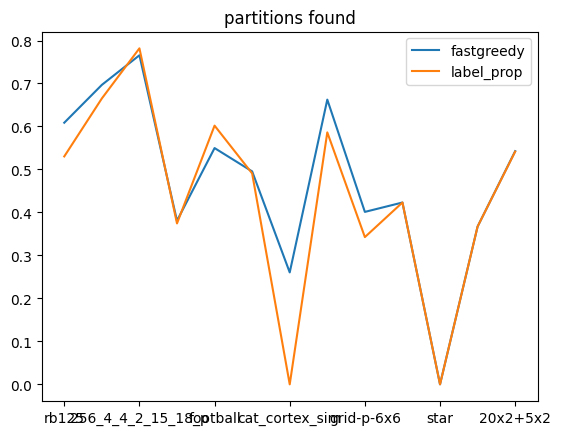

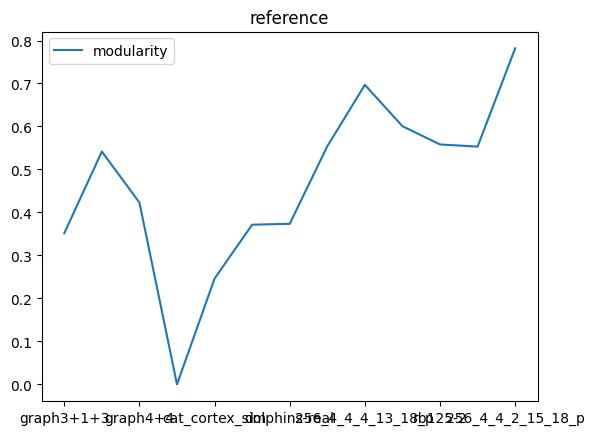

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
modularity_nets.plot(ax=ax)
ax.set_title('partitions found')
fig.savefig('/content/drive/MyDrive/modularity_nets.png')

fig, ax = plt.subplots()
modularity_clu.plot(ax=ax)
ax.set_title('reference')
fig.savefig('/content/drive/MyDrive/modularity_clu.png')

##Plotting the different partitions using a color coded principle✅

To plot the different partitions we will develop a function called plot_color_coded which takes a network name and a membership list as inputs, and produces a plot of the network where each node is color-coded based on its community membership in the given membership list. 

In fact, if a target file is specified, the plot is saved to that file, otherwise it is displayed. The function first constructs a nx.Graph object from an igraph.Graph object corresponding to the given network name. Then, it assigns a color to each node based on its community membership in the given membership list. 

The cmap variable is then set to a colormap with a number of colors equal to the number of unique communities in the membership list. 

Finally, the function uses nx.draw to draw the network with the color-coded nodes, and saves the plot to a file or displays it, depending on whether a target file was specified.

In [ ]:
def plot_color_coded(name, membership, target=None):
    G = nx.Graph(ig_nets[name].get_edgelist())
    node_colors = [membership[v.index] for v in ig_nets[name].vs]
    cmap = plt.cm.get_cmap('viridis', len(set(node_colors)))
    pos = nx.kamada_kawai_layout(G) if 'x' not in ig_nets[name].vs.attributes() else None
    nx.draw(G, pos, node_size=5, width=0.5, node_color=node_colors, cmap=cmap)
    plt.axis('off')
    if target:
        plt.savefig(target)
    else:
        plt.show()

We will apply it for every algorithm : Fast Greedy, Label Propagation and finally Louvain.

In [ ]:
def plots_alg(name):
    plot_color_coded(name, comm_fastgreedy(name).membership, '/content/drive/MyDrive/color_plots/'+name+'-fastgreedy.png' )
    plot_color_coded(name, comm_label_propagation(name).membership, '/content/drive/MyDrive/color_plots/'+name+'-label_prop.png')
    plot_color_coded(name, comm_louvain(name).membership, '/content/drive/MyDrive/color_plots/'+name+'-louvain.png')

All of the plots are saved in the google drive folder to be able to compare them afterwards. 

In [ ]:
for name in ig_nets:
    plots_alg(name)

##Comparison measures between our partitions and the reference ones using Jaccard, NMI and NVI. ✅

Actually we will compare these four algorithms  : Fast Greedy, Leading eigenvector, Label_prop and Louvain. And we will using fot this case igraph instead of networkx.

In [ ]:
comparison={}
for clu_name in clu_to_nets:
    name=clu_to_nets[clu_name]
    comparison[name] = pd.DataFrame(columns=('algorithm', 'Jaccard', 'NMI', 'NVI' ))
    
    labels_true=clu[clu_name] 
    comparison[name].loc[0]=fastgreedy(labels_true, name)
    comparison[name].loc[1]=leading_eigenvector(labels_true, name)
    comparison[name].loc[2]=label_prop(labels_true, name)
    comparison[name].loc[3]=louvain(labels_true, name)

In [ ]:
for name in comparison:
    print('')
    print(name)
    print(comparison[name])


graph3+1+3
             algorithm   Jaccard      NMI       NVI
0           fastgreedy  0.666667  0.80954  0.238237
1  leading_eigenvector  0.666667  0.80954  0.238237
2    label_propagation  0.666667  0.80954  0.238237
3              louvain  0.666667  0.80954  0.238237

20x2+5x2
             algorithm   Jaccard       NMI       NVI
0           fastgreedy  0.941176  0.938345  0.051124
1  leading_eigenvector  0.941176  0.938345  0.051124
2    label_propagation  1.000000  1.000000  0.000000
3              louvain  0.941176  0.938345  0.051124

graph4+4
             algorithm  Jaccard  NMI  NVI
0           fastgreedy      1.0  1.0  0.0
1  leading_eigenvector      1.0  1.0  0.0
2    label_propagation      1.0  1.0  0.0
3              louvain      1.0  1.0  0.0

star
             algorithm  Jaccard  NMI  NVI
0           fastgreedy      1.0  1.0  0.0
1  leading_eigenvector      1.0  1.0  0.0
2    label_propagation      1.0  1.0  0.0
3              louvain      1.0  1.0  0.0

cat_cortex_sim
 

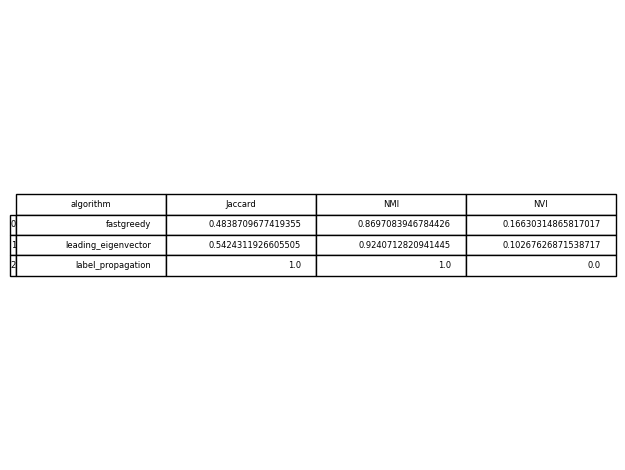

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
ax.table(cellText=comparison[name].values,
         colLabels=comparison[name].columns,
         rowLabels=comparison[name].index,
         loc='center')
fig.tight_layout()
fig.savefig('/content/drive/MyDrive/comparaison_measures/' + name + '.png')

##Comparison measures between our partitions and the reference ones using Jaccard, NMI and NVI.  ✅

Actually we will compare these four algorithms  : Greedy Modularity, k_clique, Label_prop and Louvain. And we will using fot this case networkx instead of igraph.

In [ ]:
comparison_nx = {}
for clu_name in clu_to_nets:
    name = clu_to_nets[clu_name]
    comparison_nx[name] = pd.DataFrame(columns=('algorithm', 'Jaccard', 'NMI', 'NVI' ))
    
    labels_true = clu[clu_name] 
    comparison_nx[name].loc[0] = greedy_mod_nx(labels_true, name)
    comparison_nx[name].loc[1] = louvain_nx(labels_true, name)
    comparison_nx[name].loc[2] = k_clique_nx(labels_true, name, 2) # change k as desired
    comparison_nx[name].loc[3]=label_prop_nx(labels_true, name)

In [ ]:
for name in comparison_nx:
    print('')
    print(name)
    print(comparison_nx[name])



graph3+1+3
           algorithm   Jaccard      NMI       NVI
0  greedy_modularity  0.666667  0.80954  0.238237
1            louvain  0.666667  0.80954  0.238237
2           k-clique  0.285714  0.00000  0.744544
3  label_propagation  0.666667  0.80954  0.238237

20x2+5x2
           algorithm   Jaccard       NMI       NVI
0  greedy_modularity  0.941176  0.938345  0.051124
1            louvain  0.941176  0.938345  0.051124
2           k-clique  0.326531  0.000000  0.440163
3  label_propagation  1.000000  1.000000  0.000000

graph4+4
           algorithm   Jaccard       NMI       NVI
0  greedy_modularity  1.000000  1.000000  0.000000
1            louvain  0.461538  0.585645  0.510367
2           k-clique  0.428571  0.000000  0.480898
3  label_propagation  1.000000  1.000000  0.000000

star
           algorithm  Jaccard  NMI  NVI
0  greedy_modularity      1.0  1.0  0.0
1            louvain      1.0  1.0  0.0
2           k-clique      1.0  1.0  0.0
3  label_propagation      1.0  1.0  0.0

c